# -----------------------------------------------------------------------------------------------------------

# [유통 빅데이터 분석 프로젝트]

#### A2조 : 강지우 김연경 김호준 노소은 박나희 조현영

# -----------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------

## Step0. 모듈 불러오기

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sml
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats
import graphviz
from scipy import stats
from scipy.stats import shapiro
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.anova import anova_lm
from statsmodels.tools.eval_measures import rmse
from statsmodels.api import qqplot, add_constant
from statsmodels.api import qqplot, add_constant
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from statsmodels.api import Logit

from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.linear_model import LogisticRegression
plt.rcParams['font.family'] = 'Noto Sans CJK JP'
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
# df_raw = pd.read_csv("", encoding = 'cp949')
# df_raw.head()
plt.rcParams["font.family"] = "NanumGothic"
path = 'C:/Program Files/Graphviz/bin'

# -----------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------

## Step1. 변수 별 데이터 분포 확인

### ■ jeju_member 

### Step1-1.  jeju_member 데이터 불러오기

In [14]:
df_raw = pd.read_csv("C:/Users/소은/Desktop/A2_유통/jeju_member.csv")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6013 entries, 0 to 6012
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6013 non-null   object
 1   birth_date      6013 non-null   object
 2   gender          6013 non-null   object
 3   age             6013 non-null   int64 
 4   agegroup        6013 non-null   object
 5   customer_type   6013 non-null   object
 6   customer_grade  6013 non-null   object
 7   gaip_date       6013 non-null   object
 8   taltoi_date     634 non-null    object
 9   member_month    6013 non-null   int64 
 10  gaip_path       6013 non-null   object
 11  flag_member     6013 non-null   object
 12  flag_rcv_sms    6013 non-null   object
 13  flag_rcv_email  6013 non-null   object
 14  flag_rcv_post   6013 non-null   object
 15  zipcode         6013 non-null   object
 16  sigun           6013 non-null   object
 17  dong            6013 non-null   object
 18  ri      

### Step1-2.  jeju_member 요약통계량 확인

In [15]:
df_raw.describe().round(3)

,age,member_month
count,6013.000,6013.000
mean,48.165,32.725
std,9.904,27.281
min,24.000,0.000
25%,41.000,13.000
50%,47.000,26.000
75%,54.000,41.000
max,90.000,131.000


### Step1-3.  jeju_member 데이터 분포도 확인

#### (1) 성별 데이터 변수 분포도 확인

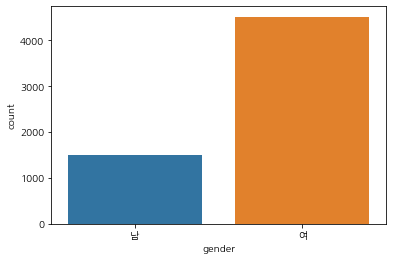

In [16]:
sns.countplot(x = 'gender', data = df_raw)

#### (2) 조합원 등급 변수 데이터 분포도 확인

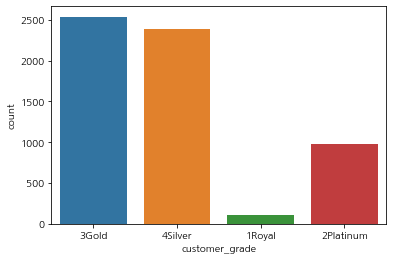

In [17]:
sns.countplot(x = 'customer_grade', data = df_raw)

#### (3) 가입경로 변수 데이터 분포도 확인

매장       3312
인터넷      1289
전화       1118
기타        256
활동가방문      24
생산지방문      14
Name: gaip_path, dtype: int64

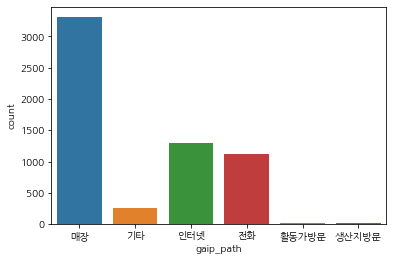

In [18]:
sns.countplot(x = 'gaip_path', data = df_raw) #가입 경로
df_raw_count = df_raw["gaip_path"].value_counts()
df_raw_count

#### (4) 고객 여부 변수 데이터 분포도 확인

Y    5379
N     634
Name: flag_member, dtype: int64

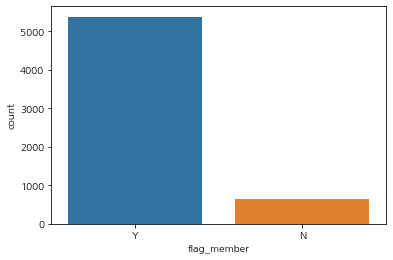

In [19]:
sns.countplot(x = 'flag_member', data = df_raw) #고객여부
df_raw_count = df_raw["flag_member"].value_counts()
df_raw_count

#### (5) sms 수신 여부 변수 데이터 분포도 확인

Y    4684
N    1329
Name: flag_rcv_sms, dtype: int64

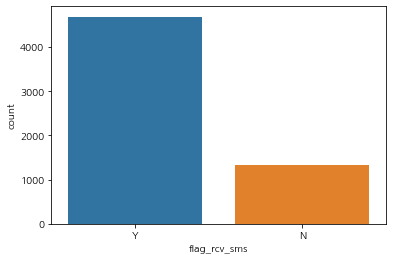

In [20]:
sns.countplot(x = 'flag_rcv_sms', data = df_raw) #SMS 수신여부
df_raw_count = df_raw["flag_rcv_sms"].value_counts()
df_raw_count

#### (6) e-mail 수신 여부 변수 데이터 분포도 확인

Y    3829
N    2184
Name: flag_rcv_email, dtype: int64

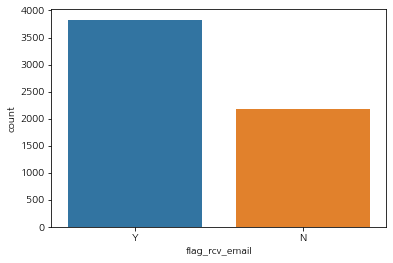

In [21]:
sns.countplot(x = 'flag_rcv_email', data = df_raw) #Email 수신여부
df_raw_count = df_raw["flag_rcv_email"].value_counts()
df_raw_count

#### (7) post 수신 여부 변수 데이터 분포도 확인

Y    4337
N    1676
Name: flag_rcv_post, dtype: int64

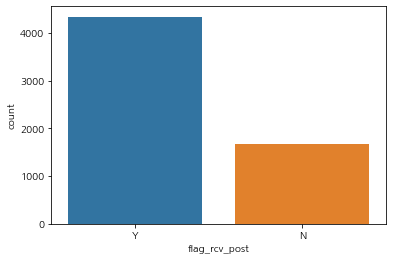

In [22]:
sns.countplot(x = 'flag_rcv_post', data = df_raw) #우편 수신 여부
df_raw_count = df_raw["flag_rcv_post"].value_counts()
df_raw_count

#### (8) 시(주소) 변수 데이터 분포도 확인

제주시     4057
서귀포시    1956
Name: sigun, dtype: int64

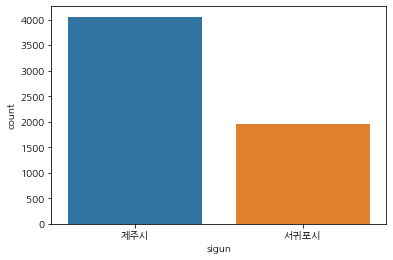

In [23]:
sns.countplot(x = 'sigun', data = df_raw)
df_raw_count = df_raw["sigun"].value_counts()
df_raw_count

#### (9) 나이, 회원기간(월) 변수 데이터 분포도 확인

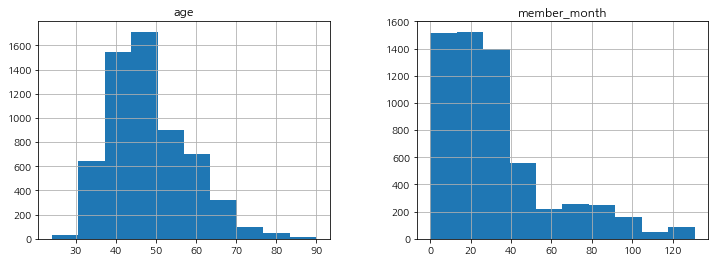

In [24]:
df_raw.hist(figsize = (12, 4))
plt.show()

----------------------------------------------------------------------------------------

### ■ jeju_sales

### Step1-4.  jeju_sales 데이터 불러오기

In [25]:
df_raw1 = pd.read_csv("C:/Users/소은/Desktop/A2_유통/jeju_sales.csv")
df_raw1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273322 entries, 0 to 273321
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   customer_id         273322 non-null  object
 1   purchase_id         273322 non-null  object
 2   store_id            273322 non-null  object
 3   purchase_yearmonth  273322 non-null  object
 4   purchase_weekday    273322 non-null  object
 5   purchase_hour       273322 non-null  int64 
 6   purchase_date       273322 non-null  object
 7   purchase_time       273322 non-null  object
 8   supply_date         273322 non-null  object
 9   item_id             273322 non-null  object
 10  item_g_l            273322 non-null  object
 11  item_g_m            273322 non-null  object
 12  item_g_s            273322 non-null  object
 13  item_name           273322 non-null  object
 14  purchase_cnt        273322 non-null  int64 
 15  unit_cost           273322 non-null  int64 
 16  pu

In [26]:
df_raw1.describe().round(3)

,purchase_hour,purchase_cnt,unit_cost,purchase_amt
count,273322.000,273322.000,273322.000,273322.000
mean,14.857,1.348,4581.885,5642.364
std,3.063,1.889,5098.084,10259.381
min,0.000,0.000,0.000,0.000
25%,12.000,1.000,1950.000,2200.000
50%,15.000,1.000,3200.000,3700.000
75%,17.000,1.000,5200.000,6400.000
max,23.000,150.000,178000.000,2096100.000


### Step1-5.  jeju_sales 요약통계량 확인

#### (1) 구매요일 변수 데이터 분포도 확인

월요일    48683
금요일    47409
화요일    44791
목요일    44063
수요일    41845
토요일    36288
일요일    10243
Name: purchase_weekday, dtype: int64

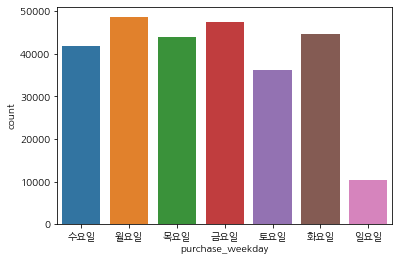

In [27]:
sns.countplot(x = 'purchase_weekday', data = df_raw1)
df_raw_count1 = df_raw1["purchase_weekday"].value_counts()
df_raw_count1

#### (2) 제품 대분류 변수 데이터 분포도 확인

채소       76954
간식       69697
축산물      46921
반찬       43885
양념/가루    26917
주곡        8948
Name: item_g_l, dtype: int64

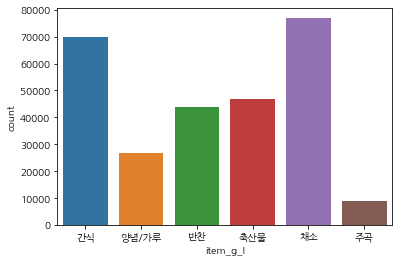

In [28]:
sns.countplot(x = 'item_g_l', data = df_raw1)
df_raw_count1 = df_raw1["item_g_l"].value_counts()
df_raw_count1

#### (3) 제품 중분류 변수 데이터 분포도 확인

잎채소         24425
과자          23361
두부/유부       19626
밀가공         16783
유제품         14518
육가공         13442
빵           12660
열매채소        11757
밑반찬         10773
유정란         10464
양념채소        10146
식사대용         9296
가루           8924
뿌리채소         8402
버섯           7537
멥쌀           7258
어묵/묵         6729
소스/기타양념      6494
말린나물/건재      6128
과일채소         5790
장            5692
떡            4991
기름/식초        4774
한우           3774
절임/장아찌       2744
잼/병조림/기타     2606
돼지           2479
김치           2055
즉석조리         1958
잎/줄기채소       1733
찹쌀           1690
닭            1558
소금           1033
꿀             671
쌈채소류          661
김장채소          219
특용작물          156
오리             15
Name: item_g_m, dtype: int64

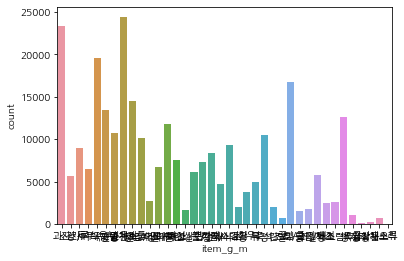

In [29]:
sns.countplot(x = 'item_g_m', data = df_raw1)
df_raw_count1 = df_raw1["item_g_m"].value_counts()
df_raw_count1

#### (4) 제품 대분류에 따른 제품 중분류 변수 데이터 분포도 확인

In [30]:
pd.crosstab(df_raw1.item_g_m, df_raw1.item_g_l, margins = True).style.background_gradient()

item_g_l,간식,반찬,양념/가루,주곡,채소,축산물,All
item_g_m,,,,,,,
가루,0,0,8924,0,0,0,8924
과일채소,0,0,0,0,5790,0,5790
과자,23361,0,0,0,0,0,23361
기름/식초,0,0,4774,0,0,0,4774
김장채소,0,0,0,0,219,0,219
김치,0,2055,0,0,0,0,2055
꿀,0,0,0,0,0,671,671
닭,0,0,0,0,0,1558,1558
돼지,0,0,0,0,0,2479,2479


# 아래 코드 수정할 것. 구매 총액, 구매 수, 구매 단가 범주를 얼마로 나눌지 생각해보기

#### (5) 구매 총액,  구매 수, 구매 시각, 구매 단가 변수 데이터 분포도 확인

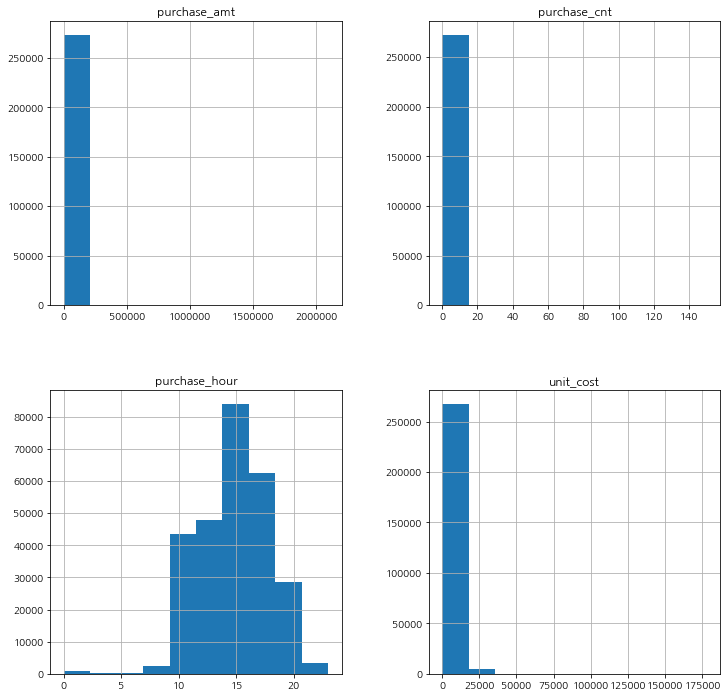

In [31]:
df_raw1.hist(figsize = (12, 12))
plt.show()

# -----------------------------------------------------------------------------------------------------------

## Step2. 결측치, 이상치 확인 및 처리

### ■ jeju_member 

### Step2-1.  jeju_member 결측치, 이상치

#### (1) jeju_member 결측치 확인

In [32]:
df_raw.isnull().sum(axis=0)

customer_id          0
birth_date           0
gender               0
age                  0
agegroup             0
customer_type        0
customer_grade       0
gaip_date            0
taltoi_date       5379
member_month         0
gaip_path            0
flag_member          0
flag_rcv_sms         0
flag_rcv_email       0
flag_rcv_post        0
zipcode              0
sigun                0
dong                 0
ri                3570
address              0
dtype: int64

###### jeju_member의 '리'에서 결측치를 가진 데이터 확인

In [33]:
df_raw[df_raw['ri'].isnull()]

,customer_id,birth_date,gender,age,agegroup,customer_type,customer_grade,gaip_date,taltoi_date,member_month,gaip_path,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address
0,C102666,1976-11-08,남,44,40대,일반,3Gold,2014-10-07,NaN,63,매장,Y,Y,Y,Y,690-170,제주시,연동,NaN,제주 제주시 연동
1,C118113,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
2,C118133,1981-03-20,남,39,30대,일반,4Silver,2011-12-07,2014-04-02,28,매장,N,Y,Y,N,699-900,서귀포시,성산읍,NaN,제주 서귀포시 성산읍
6,C118288,1972-03-16,남,48,40대,일반,4Silver,2011-12-11,2012-07-30,7,기타,N,N,Y,Y,690-042,제주시,용담2동,NaN,제주 제주시 용담2동
7,C118290,1963-10-17,여,57,50대,일반,3Gold,2011-12-11,NaN,97,매장,Y,Y,Y,Y,690-162,제주시,오라2동,NaN,제주 제주시 오라2동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5999,C704411,1980-01-15,남,40,40대,일반,4Silver,2019-12-01,NaN,1,매장,Y,Y,N,N,695-970,제주시,구좌읍,NaN,제주 제주시 구좌읍
6005,C704649,1964-10-12,여,56,50대,일반,3Gold,2019-12-02,NaN,1,매장,Y,Y,N,N,690-081,제주시,도련1동,NaN,제주 제주시 도련1동
6007,C705016,1976-01-23,여,44,40대,일반,2Platinum,2019-12-04,NaN,1,인터넷,Y,Y,N,Y,699-900,서귀포시,성산읍,NaN,제주 서귀포시 성산읍
6008,C705804,1962-08-13,여,58,50대,일반,2Platinum,2019-12-09,NaN,1,인터넷,Y,Y,Y,Y,697-070,서귀포시,동홍동,NaN,제주 서귀포시 동홍동


###### jeju_member의 '탈퇴일자'에서 결측치를 가진 데이터 확인

In [34]:
df_raw[df_raw['taltoi_date'].isnull()]

,customer_id,birth_date,gender,age,agegroup,customer_type,customer_grade,gaip_date,taltoi_date,member_month,gaip_path,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address
0,C102666,1976-11-08,남,44,40대,일반,3Gold,2014-10-07,NaN,63,매장,Y,Y,Y,Y,690-170,제주시,연동,NaN,제주 제주시 연동
1,C118113,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
3,C118278,1979-06-22,여,41,40대,일반,3Gold,2011-12-11,NaN,97,인터넷,Y,Y,Y,Y,695-791,제주시,애월읍,광령2리,제주 제주시 애월읍 광령2리 제주관광대학
7,C118290,1963-10-17,여,57,50대,일반,3Gold,2011-12-11,NaN,97,매장,Y,Y,Y,Y,690-162,제주시,오라2동,NaN,제주 제주시 오라2동
8,C118291,1962-07-19,여,58,50대,일반,1Royal,2011-12-11,NaN,97,기타,Y,Y,N,Y,690-760,제주시,노형동,부영아파트,제주 제주시 노형동 부영아파트
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,C705804,1962-08-13,여,58,50대,일반,2Platinum,2019-12-09,NaN,1,인터넷,Y,Y,Y,Y,697-070,서귀포시,동홍동,NaN,제주 서귀포시 동홍동
6009,C706457,1995-10-12,여,25,20대,일반,4Silver,2019-12-11,NaN,1,인터넷,Y,Y,Y,N,690-781,제주시,화북일동,제주대학교사라캠퍼스,제주 제주시 화북일동 제주대학교사라캠퍼스
6010,C707942,1986-09-20,여,34,30대,일반,4Silver,2019-12-19,NaN,1,인터넷,Y,Y,N,Y,695-964,제주시,조천읍,신흥리,제주 제주시 조천읍 신흥리
6011,C707954,1984-04-20,여,36,30대,일반,3Gold,2019-12-19,NaN,1,인터넷,Y,N,N,N,690-806,제주시,도남동,1~51,제주 제주시 도남동 1~51


#### ※ '탈퇴일자'와 '리'에서 결측치 발견

- 1. 탈퇴일자가 없다는 것은 아직 회원이라는 의미이므로 결측치가 아니라고 판단함.
- 2. 우리나라 행정구역상으로 리까지는 표기되지 않는 곳들이 많기 때문에 결측치라고 판단하지 않음.

#### (2) jeju_member 이상치 확인

#### ※ '회원기간'에서 이상치 발견

In [35]:
df_raw.describe().round(3)

,age,member_month
count,6013.000,6013.000
mean,48.165,32.725
std,9.904,27.281
min,24.000,0.000
25%,41.000,13.000
50%,47.000,26.000
75%,54.000,41.000
max,90.000,131.000


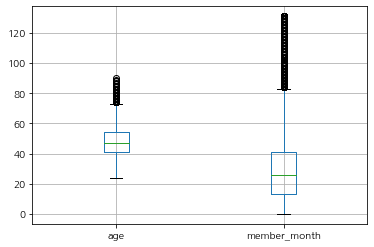

In [36]:
df_raw.boxplot()

###### jeju_member의 '회원 기간(월)'에서 이상치를 가진 데이터 확인

In [37]:
out = df_raw.query('member_month==0')
out

,customer_id,birth_date,gender,age,agegroup,customer_type,customer_grade,gaip_date,taltoi_date,member_month,gaip_path,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address
164,C136288,1973-12-22,남,47,40대,일반,3Gold,2012-07-08,2012-07-10,0,인터넷,N,Y,Y,N,690-760,제주시,노형동,부영아파트,제주 제주시 노형동 부영아파트
310,C154193,1973-01-29,남,47,40대,일반,3Gold,2012-11-29,2012-11-29,0,매장,N,N,N,N,690-162,제주시,오라2동,NaN,제주 제주시 오라2동
338,C156182,1965-02-13,남,55,50대,일반,4Silver,2012-12-19,2012-12-19,0,매장,N,Y,Y,N,690-170,제주시,연동,NaN,제주 제주시 연동
341,C156317,1976-01-28,여,44,40대,일반,4Silver,2012-12-20,2012-12-20,0,전화,N,Y,N,N,690-760,제주시,노형동,부영아파트,제주 제주시 노형동 부영아파트
354,C157925,1969-04-19,남,51,50대,일반,2Platinum,2013-01-06,2013-01-16,0,전화,N,N,Y,Y,690-180,제주시,노형동,NaN,제주 제주시 노형동
480,C223425,1971-10-30,남,49,40대,일반,4Silver,2013-07-16,2013-07-16,0,기타,N,N,Y,Y,699-931,서귀포시,대정읍,구억리,제주 서귀포시 대정읍 구억리
511,C226937,1950-12-23,여,70,70대,일반,4Silver,2013-08-20,2013-08-21,0,매장,N,N,Y,N,695-916,제주시,애월읍,유수암리,제주 제주시 애월읍 유수암리
516,C227469,1950-12-23,남,70,70대,일반,3Gold,2013-08-27,2013-08-28,0,전화,N,N,Y,Y,695-916,제주시,애월읍,유수암리,제주 제주시 애월읍 유수암리
528,C229735,1966-02-14,남,54,50대,일반,3Gold,2013-09-11,2013-09-11,0,매장,N,N,Y,Y,690-180,제주시,노형동,NaN,제주 제주시 노형동
551,C234236,1974-08-10,여,46,40대,일반,4Silver,2013-10-11,2013-10-31,0,매장,N,Y,N,N,690-090,제주시,봉개동,NaN,제주 제주시 봉개동


- 회원 기간(월)이 0인 데이터들이 있는데 이상치로 쳐야 할까? 
- →(이상치 처리 방법) 확인 결과 모두 가입한치 한달이 채 안돼서 0으로 처리한 것을 알 수 있었음.

----------------------------------------------------------------------------------------

### ■ jeju_sales

### Step2-2.  jeju_sales 결측치, 이상치

#### (1) jeju_sales 결측치 확인

In [38]:
df_raw1.isnull().sum(axis=0)

customer_id           0
purchase_id           0
store_id              0
purchase_yearmonth    0
purchase_weekday      0
purchase_hour         0
purchase_date         0
purchase_time         0
supply_date           0
item_id               0
item_g_l              0
item_g_m              0
item_g_s              0
item_name             0
purchase_cnt          0
unit_cost             0
purchase_amt          0
dtype: int64

- 결측치 없음

#### (2) jeju_sales 이상치 확인

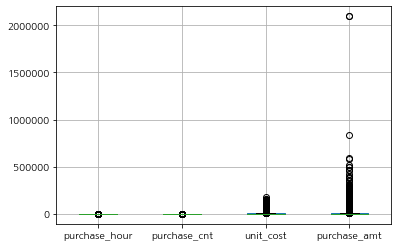

In [39]:
df_raw1.boxplot()

###### jeju_sales의 '구매 총액'에서 이상치를 가진 데이터 확인

#### ※ '구매 총액'에서 이상치 발견

- 구매 총액이 특출나게 높은 데이터가 있는데 이상치로 쳐야 할까? 
- →(이상치 처리 방법) 확인 결과 구매총액에서 특정 구매 총액 가격이 특출나게 높은 것은 vip고객일 수 있으므로 이상치로 생각해서 데이터를 제거하면 안된다고 판단함. 

# -----------------------------------------------------------------------------------------------------------

## Step3. 파생변수 생성

### Step3-0.  jeju_member, jeju_sales 데이터 불러오기

In [40]:
df_raw = pd.read_csv("C:/Users/소은/Desktop/A2_유통/jeju_member.csv",parse_dates = ['gaip_date','taltoi_date'])
df = pd.read_csv("C:/Users/소은/Desktop/A2_유통/jeju_sales.csv",parse_dates = ['purchase_date','supply_date', ])

### Step3-1. 구매일자를 계절별로 묶음

In [41]:
df.set_index('purchase_date', inplace = True)
df['month']=df.index.month 
month = df.month
season=[]


for _ in range(len(month)):
    if month[_] == 3 or month[_] == 4 or month[_] == 5:
        season.append('spring')
       # print("spring")# spring 
    elif month[_] == 6 or month[_] == 7 or month[_] == 8:
        season.append('summer')
        #print("summer")# summer
    elif month[_] == 9 or month[_] == 10 or month[_] == 11:
        season.append('fall')
        #print("fall")# fall
    else:
        season.append('winter')
        #print("winter")# winter

quarter = []
        
for _ in range(len(month)):
    if month[_] == 1 or month[_] == 2 or month[_] == 3:
        quarter.append('1')
       # print("spring")# spring 
    elif month[_] == 4 or month[_] == 5 or month[_] == 6:
        quarter.append('2')
        #print("summer")# summer
    elif month[_] == 7 or month[_] == 8 or month[_] == 9:
        quarter.append('3')
        #print("fall")# fall
    else:
        quarter.append('4')
        #print("winter")# winter
        
        
df['purchase_SEASON'] = season
df['purchase_Quarter'] = quarter

### Step3-2. 공급일자를 계절별로 묶음

In [ ]:
df.set_index('supply_date', inplace = True)
df['month']=df.index.month 
month = df.month
season=[]

for _ in range(len(month)):
    if month[_] == 3 or month[_] == 4 or month[_] == 5:
        season.append('spring')
       # print("spring")# spring 
    elif month[_] == 6 or month[_] == 7 or month[_] == 8:
        season.append('summer')
        #print("summer")# summer
    elif month[_] == 9 or month[_] == 10 or month[_] == 11:
        season.append('fall')
        #print("fall")# fall
    else:
        season.append('winter')
        #print("winter")# winter
        
quarter = []
        
for _ in range(len(month)):
    if month[_] == 1 or month[_] == 2 or month[_] == 3:
        quarter.append('1')
     
    elif month[_] == 4 or month[_] == 5 or month[_] == 6:
        quarter.append('2')
       
    elif month[_] == 7 or month[_] == 8 or month[_] == 9:
        quarter.append('3')
        
    else:
        quarter.append('4')
       
        
df['supply_SEASON'] = season
df['supply_Quarter'] = quarter

### Step3-3. 탈퇴일자를 계절별로 묶음

In [ ]:
df_raw.set_index('taltoi_date', inplace = True)
# df.set_index('supply_date', inplace = True)
df_raw['month']=df_raw.index.month 
month = df_raw.month
season=[]


for _ in range(len(month)):
    if month[_] == 3 or month[_] == 4 or month[_] == 5:
        season.append('spring')
       # print("spring")# spring 
    elif month[_] == 6 or month[_] == 7 or month[_] == 8:
        season.append('summer')
        #print("summer")# summer
    elif month[_] == 9 or month[_] == 10 or month[_] == 11:
        season.append('fall')
        #print("fall")# fall
    else:
        season.append('winter')
        #print("winter")# winter

quarter = []
        
for _ in range(len(month)):
    if month[_] == 1 or month[_] == 2 or month[_] == 3:
        quarter.append('1')
     
    elif month[_] == 4 or month[_] == 5 or month[_] == 6:
        quarter.append('2')
       
    elif month[_] == 7 or month[_] == 8 or month[_] == 9:
        quarter.append('3')
        
    else:
        quarter.append('4')
       
        
df_raw['taltoi_SEASON'] = season
df_raw['taltoi_Quarter'] = quarter

### Step3-4. 가입일자를 계절별로 묶음

In [ ]:
df_raw.set_index('gaip_date', inplace = True)

df_raw['month']=df_raw.index.month 
month = df_raw.month
season=[]


for _ in range(len(month)):
    if month[_] == 3 or month[_] == 4 or month[_] == 5:
        season.append('spring')
       # print("spring")# spring 
    elif month[_] == 6 or month[_] == 7 or month[_] == 8:
        season.append('summer')
        #print("summer")# summer
    elif month[_] == 9 or month[_] == 10 or month[_] == 11:
        season.append('fall')
        #print("fall")# fall
    else:
        season.append('winter')
        #print("winter")# winter


quarter = []
        
for _ in range(len(month)):
    if month[_] == 1 or month[_] == 2 or month[_] == 3:
        quarter.append('1')
     
    elif month[_] == 4 or month[_] == 5 or month[_] == 6:
        quarter.append('2')
       
    elif month[_] == 7 or month[_] == 8 or month[_] == 9:
        quarter.append('3')
        
    else:
        quarter.append('4')
       
        
df_raw['gaip_SEASON'] = season
df_raw['gaip_Quarter'] = quarter

### Step3-5. 구매열월을 '년'과 '월'로 나눔

In [ ]:
yearmonth =[]
yearmonth = df.purchase_yearmonth


for i in range(len(yearmonth)):
    year, month = (yearmonth[i].split("M"))

In [ ]:
df_raw.to_excel("jeju_member_new.xlsx")
df.to_excel("jeju_sales_new.xlsx")

# -----------------------------------------------------------------------------------------------------------

## Step4. EDA

### Step4-0. CSV 파일 병합

#### [파일 병합 방법]
##### 'customer_id'를 조인키로 사용해서 jeju_members.csv와 jeju_sales.csv 파일 병합
##### WHY? 2개 파일 병합 후 여러 변수간 상관관계를 파악하기 위해서

In [84]:
merge_df = pd.merge(df_jeju_members, df_jeju_sales)
merge_df

,customer_id,birth_date,gender,age,agegroup,customer_type,customer_grade,gaip_date,taltoi_date,member_month,...,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt,month
0,C118113,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaT,97,...,2018-01-10,P08010117,간식,과자,스낵,꼬마찹쌀모나카(112g/8개),1,3000,3000,1
1,C118113,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaT,97,...,2018-01-10,P09040101,양념/가루,장,간장,제주전통어간장(500ml),1,7900,7900,1
2,C118113,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaT,97,...,2018-01-10,P09040100,양념/가루,장,간장,맛간장(900ml),1,13600,13600,1
3,C118113,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaT,97,...,2018-10-08,P09010305,양념/가루,가루,곡식가루,엿기름가루(무/500g),2,3200,6400,10
4,C118113,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaT,97,...,2018-10-08,P09010301,양념/가루,가루,곡식가루,메주가루(500g),2,11000,22000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273317,C705016,1976-01-23,여,44,40대,일반,2Platinum,2019-12-04,NaT,1,...,2019-12-22,P01010104,주곡,멥쌀,백미,백미/유(4kg)-매장용,1,15700,15700,12
273318,C705016,1976-01-23,여,44,40대,일반,2Platinum,2019-12-04,NaT,1,...,2019-12-22,P08010301,간식,과자,한과/유과,차례상약과(350g/10개),1,8800,8800,12
273319,C705016,1976-01-23,여,44,40대,일반,2Platinum,2019-12-04,NaT,1,...,2019-12-22,P06040300,축산물,유제품,아이스크림,유기농아이스크림(기본형),1,8900,8900,12
273320,C705016,1976-01-23,여,44,40대,일반,2Platinum,2019-12-04,NaT,1,...,2019-12-29,P08040137,간식,빵,빵,쌀로만든잉글리쉬머핀(66g×4개)/매장,1,3900,3900,12


In [ ]:
merge_df["flag_member"]

#### 고객 ID로 병합 (개인별 구매 총액)

In [ ]:
df_raw_customerID=df_raw1.filter(['customer_id','purchase_amt'])
df_raw_customerID

In [ ]:
df_raw_customerID_new=df_raw_customerID.groupby('customer_id').max()
df_raw_customerID_new

In [ ]:
df_raw_customerID1=df_raw.filter(['customer_id','gender','agegroup'])
df_raw_customerID1

In [ ]:
df_raw_customerID_new1=df_raw_customerID1.groupby('customer_id').max()
df_raw_customerID_new1

In [ ]:
merge_df_new = pd.merge(df_raw_customerID_new, df_raw_customerID_new1, how='left', on='customer_id')
merge_df_new

- 고객 아이디(개인)별 구매 총액, 성별, 연령대 병합 최종 파일 : merge_df_new

- RFM

### Step4-1. 탈퇴 고객 원인 분석

###### *히스토그램 그래프를 하나로 나타내지 못하는 이유: 구매 고객과 탈퇴 고객의 수가 압도적으로 차이나서 한 그래프에 나타낼 수 없다.
###### 유지 고객은 약 5379이고, 탈퇴 고객은 634명임.

### 1. 조합원 등급에 따른 탈퇴 고객

In [ ]:
plt.hist(df_raw[df_raw["flag_member"]=="Y"]["customer_grade"], label="고객", alpha=0.5)

- 고객인 경우는 3Gold 등급이 가장 많고 1Royal 등급이 가장 적음

In [ ]:
plt.hist(df_raw[df_raw["flag_member"]== "N"]["customer_grade"], label="고객아님", alpha=0.5)      

- 고객이 아닌 경우는 4Silver 등급이 가장 많음

- 탈퇴 고객은 유지 고객대비 4Silver 등급 고객이 가장 많으므로 4Silver 등급 고객을 관리해야함

### 2. 가입 경로에 따른 탈퇴 고객

In [ ]:
plt.hist(df_raw[df_raw["flag_member"]=="Y"]["gaip_path"], label="고객", alpha=0.5)  

In [ ]:
plt.hist(df_raw[df_raw["flag_member"]== "N"]["gaip_path"], label="고객아님", alpha=0.5)

- 탈퇴 고객은 매장이 가장 많음.

- 그러나 유지 고객 대비 탈퇴 고객 비율이 크게 차이 나지 않아서 상관관계가 크게 없음.

### 3. 탈퇴 고객의 연령

In [ ]:
plt.hist(df_raw[df_raw["flag_member"]== "Y"]["agegroup"], label="고객", alpha=0.5)

- 고객인 경우는 40대가 가장 많고 50대, 30대 60대가 뒤를 이음

- 20대, 80대 고객은 거의 없음.

In [ ]:
plt.hist(df_raw[df_raw["flag_member"]== "N"]["agegroup"], label="고객", alpha=0.5)

- 탈퇴 고객은 40대가 가장 많고 50대가 뒤를 이음.

- 20대는 고객 자체 수가 매우 적음.

### 4. 탈퇴 고객의 성별

In [ ]:
plt.hist(df_raw[df_raw["flag_member"]== "Y"]["gender"], label="고객", alpha=0.5)

- 여자 고객이 남자 고객보다 압도적으로 많음을 확인할 수 있음.

In [ ]:
plt.hist(df_raw[df_raw["flag_member"]== "N"]["gender"], label="고객", alpha=0.5)

- 탈퇴 고객 중 남자와 여자의 비율이 비슷함.

- 남자 고객은 수가 적지만 탈퇴 비율은 여자보다 훨씬 높음을 알 수 있음.

### Step4-2. 구매 고객 분포 분석

#### 1. 계절별 어떤 제품을 가장 많이 구매하는가

In [ ]:
plt.hist(df_raw1[df_raw1["purchase_SEASON"]== "winter"]["item_g_l"], label="겨울", alpha=0.4)
plt.hist(df_raw1[df_raw1["purchase_SEASON"]== "fall"]["item_g_l"], label="가을", alpha=0.3)
plt.hist(df_raw1[df_raw1["purchase_SEASON"]== "spring"]["item_g_l"], label="봄", alpha=0.1)
plt.hist(df_raw1[df_raw1["purchase_SEASON"]== "summer"]["item_g_l"], label="여름", alpha=0.4)
plt.legend()

- 전체적으로 구매량은 여름에 가장 많고, 여름에 채소를 가장 많이 구매함

#### 2. 연령별 어떤 제품을 가장 많이 구매하는가

In [ ]:
#20대
df_sub=merge_df[merge_df["agegroup"]=="20대"]
df_count=df_sub.groupby("item_g_l", as_index=False).agg("count")
df_count.plot.pie(y="agegroup", labels=df_count["item_g_l"], autopct="%.1f%%", radius=2)

#30대
df_sub=merge_df[merge_df["agegroup"]=="30대"]
df_count=df_sub.groupby("item_g_l", as_index=False).agg("count")
df_count.plot.pie(y="agegroup", labels=df_count["item_g_l"], autopct="%.1f%%", radius=2)

#40대
df_sub=merge_df[merge_df["agegroup"]=="40대"]
df_count=df_sub.groupby("item_g_l", as_index=False).agg("count")
df_count.plot.pie(y="agegroup", labels=df_count["item_g_l"], autopct="%.1f%%", radius=2)

#50대
df_sub=merge_df[merge_df["agegroup"]=="50대"]
df_count=df_sub.groupby("item_g_l", as_index=False).agg("count")
df_count.plot.pie(y="agegroup", labels=df_count["item_g_l"], autopct="%.1f%%", radius=2)

#60대
df_sub=merge_df[merge_df["agegroup"]=="60대"]
df_count=df_sub.groupby("item_g_l", as_index=False).agg("count")
df_count.plot.pie(y="agegroup", labels=df_count["item_g_l"], autopct="%.1f%%", radius=2)

#70대
df_sub=merge_df[merge_df["agegroup"]=="70대"]
df_count=df_sub.groupby("item_g_l", as_index=False).agg("count")
df_count.plot.pie(y="agegroup", labels=df_count["item_g_l"], autopct="%.1f%%", radius=2)

#80대
df_sub=merge_df[merge_df["agegroup"]=="80대"]
df_count=df_sub.groupby("item_g_l", as_index=False).agg("count")
df_count.plot.pie(y="agegroup", labels=df_count["item_g_l"], autopct="%.1f%%", radius=2)

#### 3. 연령별 돈을 얼마나 많이 쓰는가?

In [ ]:
plt.hist(merge_df[merge_df["Purchase_amt_change"]== "1"]["agegroup"], label="40대", alpha=0.4)

#### 4. 가입 경로별 구매 금액

- 알 수 없음.

### 5. 연령대 별 가입 경로

In [ ]:
plt.hist(df_raw[df_raw["agegroup"]== "20대"]["gaip_path"], label="20대", alpha=0.4)
plt.hist(df_raw[df_raw["agegroup"]== "30대"]["gaip_path"], label="30대", alpha=0.4)
plt.hist(df_raw[df_raw["agegroup"]== "40대"]["gaip_path"], label="40대", alpha=0.4)
plt.legend()

- 전체적으로 매장을 통해 가입한 수가 많음.

- 20대는 매장에서 가입한 수가 많음. 그러나 20대 자체 데이터 수가 적어서 의미 없음.

In [ ]:
#히트맵

#colormap=plt.cm.PuBu
#plt.figure(figsize=(12,8))
#plt.title("Person Correlation of Features", y=1.05, size=15)
#sns.heatmap(merge_df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor="white", annot=True)

# -----------------------------------------------------------------------------------------------------------

## Step5. RFM

### Step5-0. 모듈 불러오기

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sml
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats
from scipy import stats
from scipy.stats import shapiro
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.anova import anova_lm
from statsmodels.tools.eval_measures import rmse
from statsmodels.api import qqplot, add_constant
from statsmodels.api import qqplot, add_constant
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from statsmodels.api import Logit
import graphviz
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.linear_model import LogisticRegression
plt.rcParams['font.family'] = 'Noto Sans CJK JP'
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
# df_raw = pd.read_csv("", encoding = 'cp949')
# df_raw.head()
#plt.rcParams["font.family"] = "NanumGothic"
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Malgun Gothic"
path = 'C:/Program Files/Graphviz/bin'
matplotlib.rc('font',family = 'Malgun Gothic')

In [ ]:
matplotlib.rc('font', family = 'Noto Sans CJK JP')
plt.rcParams['font.family'] = 'Noto Sans CJK JP'

In [ ]:
original = pd.DataFrame()
original['mean'] = merge_df.groupby(['customer_grade'])['purchase_amt'].agg('mean')
original['count'] = merge_df['customer_grade'].value_counts()
original

In [ ]:
import datetime as dt
NOW = dt.datetime(2019,12,30)
# NOW는 데이터 마지막 날짜 + 1 한 값
# NOW는 데이터 마지막 날짜 + 1 한 값

In [ ]:
# customer_id로 그룹화
# rfm.rename: 새로우 테이블을 만듬
rfm = merge_df.groupby('customer_id').agg({
                                        'purchase_date' : lambda x: (NOW - x.max()).days,
                                         'purchase_id'  : lambda x: len(x),
                                         'purchase_amt' : lambda x : sum(x)
                                       })
rfm.rename(columns = {'purchase_date': 'Recency',
                         'purchase_id': 'Frequency',
                         'purchase_amt': 'MonetaryValue'}, inplace = True)

rfm.head(20)

- 사분위수로 나누어 Recency, Frequency 및 MonetaryValue 값을 개별적으로 부여.
- 세 가지 등급을 결합하여 RFM Segment를 얻음
- 세 가지 등급을 합산하여 RFM 점수 획득.
- RFM Segment를 요약해서 결과 분석.
- 우리 유통는 고객이 '더 자주 방문'하고 '더 많은 비용'을 지출하기를 원하기 때문에 "Frequency"와 "Monetary"를 높게 평가했음.

In [ ]:
# qcut 함수를 사용하여 RFM 그룹, 라벨 및 사분위수 계산
r_labels = range(4, 0, -1)plt.grid(True)
f_labels = range(1, 5)
m_labels = range(1, 5)

# 4개의 동일한 백분위수 그룹에 label 할당
r_groups = pd.qcut(rfm['Recency'], q = 4, labels = r_labels)
# 4개의 동일한 백분위수 그룹에 label 할당
f_groups = pd.qcut(rfm['Frequency'], q = 4, labels = f_labels)
# 4개의 동일한 백분위수 그룹에 label 할당
m_groups = pd.qcut(rfm['MonetaryValue'], q = 4, labels = m_labels)

In [ ]:
print(r_groups[:5])
print(f_groups[:5])
print(m_groups[:5])

In [ ]:
# 원래 RFM에 새 Column 추가
rfm = rfm.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)
rfm.head(20)

In [ ]:
rfm_s = rfm.sort_values(by=["MonetaryValue", "M"], ascending=[True, True])

In [ ]:
rfm_s.tail()

In [ ]:
# Recency 727 ~ 215 : 1점
# Recency 214 ~ 62 : 2점
# Recency 61 ~ 15 : 3점
# Recency 14 ~ 0 : 4점

In [ ]:
# Frequency 1 ~ 7 : 1점
# Frequency 8 ~ 23 : 2점
# Frequency 24 ~ 97 : 3점
# Frequency 98 ~ 3,299 : 4점

In [ ]:
# Monetary 1,000 ~ 37,200 : 1점
# Monetary 37,300 ~ 141,950 : 2점
# Monetary 142,500 ~ 533,200 : 3점
# Monetary 533,300 ~ 61,662,297 : 4점# 세 가지 등급을 결합하여 RFM Segment를 얻음.

In [ ]:
# 세 가지 등급을 결합하여 RFM Segment를 얻음.
rfm['RFM_segment'] = rfm.apply(lambda x: (str(x['R']) + str(x['F']) + str(x['M'])), axis=1)
rfm.head(20)plt.grid(True)

In [ ]:
# 데이터 타입 확인
rfm.dtypes

In [ ]:
# R, F, M, RFM_Score 4개 Column 데이터 타입 float로 변경.
rfm = rfm.astype({'R':'float'})
rfm = rfm.astype({'F':'float'})
rfm = rfm.astype({'M':'float'})
# rfm = rfm.astype({'RFM_Score':'float'})

In [ ]:
plt.grid(True)# 데이터 타입 변경 확인.
rfm.dtypes

In [ ]:
# 세 가지 등급을 합산하여 RFM 점수를 얻음.
rfm['RFM_Score'] = rfm['R'] * 0.2 + rfm['F'] * 0.3 + rfm['M'] * 0.5
rfm['RFM_Score'] = rfm['RFM_Score'].apply(lambda x : float(x))
rfm.head(100)

In [ ]:
rfm.describe()

In [ ]:
# # RFM_segment 333 경우만 출력
# print(rfm['RFM_segment'].nunique())
# print(rfm['RFM_Score'].unique())
# rfm[rfm['RFM_segment'] == '333'].head(20)

In [ ]:
# 중요도에 따라 rfm_level 함수를 정의하는 함수 생성.
# 사분위로 등급을 나눔
# 50%까지는 4Silver
# 50~75% 사이는 3Gold
# 75~99% 사이는 2Platinum
# 100% 즉, Max만 1Royal

def rfm_level(df):
    if df['RFM_Score'] >= 4:
        return 'Royal'
    elif ((df['RFM_Score'] >= 3.0) and (df['RFM_Score'] < 4)):
        return 'Platinum'
    elif ((df['RFM_Score'] >= 2.0) and (df['RFM_Score'] < 3.0)):
        return 'Gold'
    elif ((df['RFM_Score'] >= 1) and (df['RFM_Score'] < 2.0)):
        return 'Silver'
#     else:
#         return

# 새 변수 RFM_Level 생성
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
rfm.head(30)

In [ ]:
rfm['RFM_Level'].value_counts().plot(kind = 'bar', figsize = (10, 5), color = 'skyblue')
# plt.title('Customer Distribution Across Different RFM levels', fontsize = 15)
plt.xticks(rotation = 0)
plt.grid(False)
plt.show()

In [ ]:
merge1 = pd.read_excel('merge1.xlsx')
merge1

In [ ]:
sales = merge1[merge1['customer_id'] != 'C355132']

In [ ]:
sales.set_index('customer_id', inplace = True)

In [ ]:
rfm['purchase_amt'] = sales['purchase_amt']
rfm.info()

In [ ]:
RFM_total = pd.DataFrame()

RFM_total['level'] = rfm['RFM_Level']
RFM_total['price'] = rfm['purchase_amt']
RFM_total.count()

### Step5-1. 회원분류 재분류 전 지표

In [ ]:
change = pd.DataFrame()
change['count'] = sales['customer_grade'].value_counts()
change['mean'] = sales.groupby(['customer_grade'])['purchase_amt'].agg('mean').round(1)


change

# (1,540 * 24,365) + (751 * 40,081) + (371 * 12,140) + (92 * 106,696) = 81,942,903원

### Step5-2. 회원등급 재분류 후의 지표

In [ ]:
level_price = pd.DataFrame()
level_price['count'] = rfm['RFM_Level'].value_counts()
level_price['mean'] = RFM_total.groupby(['level'])['price'].agg('mean').round(1)

level_price

# (955 * 12,140) + (742 * 24,365) + (663 * 40,081) + (395 * 106,696) = 98,391,153원

- 재분류 전 매출 - 재분류 후 매출 = 99,590,903원 - 81,942,903원 = 16,448,250원

- Royal 등급 매출 차익 = 42,145,236 - 9,816,105 = 32,329,131원

### Step5-3. K-means

In [ ]:
merge_df['customer_id'] = '/' + merge_df['customer_id'].astype(str)

In [ ]:
merge_df['customer_id'] = merge_df['customer_id'].str.extract('(\d+)', expand = False)

In [ ]:
print(merge_df)

In [ ]:
cols = ['customer_id','purchase_amt']
x_merge_df = merge_df[cols]

sc = StandardScaler()
x_merge_df_scaled = sc.fit_transform(x_merge_df)

In [ ]:
wcss = []

for i in range(1, 12):
    
    kmeans = KMeans(n_clusters = i, 
                    init       = 'k-means++', 
                    max_iter   = 300, 
                    n_init     = 10, 
                    random_state = 0)
    
    kmeans.fit(x_merge_df_scaled)
    
    wcss.append(kmeans.inertia_)

In [ ]:
plt.plot(range(1, 12), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('purchase_amt') 
plt.show()

In [ ]:
x_merge_df = merge_df[cols]
x_merge_df_scaled = sc.fit_transform(x_merge_df)

In [ ]:
kmeans = KMeans(n_clusters = 4,  # optimum cluster
                    init       = 'k-means++', 
                    max_iter   = 300, 
                    n_init     = 10, 
                    random_state = 0)

y_pred = kmeans.fit_predict(x_merge_df_scaled)

In [ ]:
merge_df['customer_id'] = y_pred
y_pred_train = kmeans.fit_predict(x_merge_df_scaled)
merge_df['customer_id'] = y_pred_train

In [ ]:
merge_df['customer_id'].unique()
merge_df['customer_id'].value_counts()

# -----------------------------------------------------------------------------------------------------------

## Step6. 수요 예측

### Step6-0. 모듈 불러오기

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
df_raw1 = pd.read_csv("jeju_sales.csv", parse_dates=['purchase_date','supply_date'])
df_raw1.head()

In [ ]:
df_raw_customerID=df_raw1.filter(['purchase_date','item_g_m','purchase_cnt'])
df_raw_customerID

In [ ]:
df_q = df_raw_customerID.query('item_g_m=="과자"')
# display_side_by_side(df_raw_customerID, df_q)
df_q

In [ ]:
df_sample= df_q.drop(['item_g_m'], axis = 1)

In [ ]:
df_sample.head()

In [ ]:
df_sample['purchase_date']=pd.to_datetime(df_sample['purchase_date'])

In [ ]:
df_sample.info()

In [ ]:
# df_rs = df_sample.reset_index().set_index('purchase_date')
df_rs = df_sample.set_index(keys=['purchase_date'], inplace=False, drop=True)

### Step6-1. 월 별 과자 판매량

In [ ]:
# df_sample['purchase_date'].resample('1M').sum()
real = df_rs.resample('W').sum()

In [ ]:
areal = real.reset_index()

In [ ]:
snack = areal.rename({'purchase_date':'ds', 'purchase_cnt':'y'}, axis=1)
snack

In [ ]:
from prophet import fbProphet

### Step6-2. 정규화

In [ ]:
m = Prophet()
m.fit(snack)

In [ ]:
# 120일 예측
future = m.make_future_dataframe(periods=365)
future.tail()

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
fig = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)

### Step6-3. 트렌드 변화시점을 명시

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
m = Prophet(changepoint_prior_scale=0.7)
m.fit(snack)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.7,
    # seasonality
    weekly_seasonality=20,
    yearly_seasonality=20,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)

m.fit(snack)
fig4 = m.plot(forecast)

In [ ]:
fig = m.plot_components(forecast)

## Step7. 유통 연관규칙(대분류)

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
df_raw = pd.read_csv("jeju_member.csv")
df_raw.head() #member_csv를 읽어옴

In [ ]:
df_raw1 = pd.read_csv("jeju_sales.csv", parse_dates=['purchase_date','supply_date'])
df_raw1.head() #sales_csv를 읽어옴

In [ ]:
merge_df = pd.merge(df_raw, df_raw1, how='left', on='customer_id')
merge_df #member,sales를 병합함

In [ ]:
# offline-online 파생변수 생성
def make_onoff(data):
    if data["gaip_path"] == "매장": # '매장' 일 경우
        return "offline"
    else: # '매장' 외 나머지 일 경우
        return "online"

merge_df["ON_OFF"] = merge_df.apply(make_onoff, axis=1) # 'make_onoff' 함수를 돌리면서 파생변수 'ON_OFF' 생성
merge_df["ON_OFF"].value_counts() # 'offline'과 'online' 개수 카운팅

In [ ]:
merge_df.head() #파생변수 생성 확인

In [ ]:
df_onoff = merge_df.filter(['ON_OFF'])
df_onoff #온라인/오프라인 열 보여줌

In [ ]:
df_onoff_new = df_onoff.groupby('ON_OFF', as_index=False).agg(','.join)
df_onoff_new #온라인/오프라인 그룹화함

In [ ]:
df_raw_customerID=merge_df.filter(['purchase_id','item_g_l'])
df_raw_customerID #구매아이디/항목(대분류) 열 보여줌

In [ ]:
df_raw_customerID_new=df_raw_customerID.groupby('purchase_id', as_index=False).agg(','.join)
df_raw_customerID_new #구매아이디 기준으로 그룹화 해서 보여줌

### Step7-1. 대분류

In [ ]:
merge_df1 = df_raw_customerID_new.loc[:,'item_g_l']

In [ ]:
merge_df1 #항목(대분류) 보여줌

In [ ]:
my_list = []
tem_list = []

In [ ]:
for index in range(len(merge_df1)):
    tem_list.append(merge_df1[index])
    my_list.append(tem_list)
    tem_list = []
# print(df1[1])
# for index in range(len(df1)):
#     tem_list.append(df1[index])
#     my_list.append(tem_list)
#     tem_list = []

In [ ]:
my_list #merge_df1 즉,항목(대분류)를 리스트로 만듦

In [ ]:
# 리스트 내의 중복 제거
small_list = my_list[0][0].split(",")
my_dict = {}

for data in small_list:
    if data in my_dict:
        my_dict[data] = 1
    else:
        my_dict[data] = 1
        
print(my_dict)



In [ ]:
# 리스트 내의 중복 제거
small_list = my_list[1][0].split(",")
my_dict = {}

for data in small_list:
    if data in my_dict:
        my_dict[data] = 1
    else:
        my_dict[data] = 1
        
print(my_dict)



In [ ]:
# 리스트 내의 중복 제거
del_list = []
sum_list = []
for index in range(len(my_list)):
    small_list = my_list[index][0].split(",")
    my_dict = {}
    
    for data in small_list:
        if data in my_dict:
            my_dict[data] = 1
        else:
            my_dict[data] = 1
    
    for dict_key in my_dict.keys():
        del_list.append(dict_key)
    
    sum_list.append(del_list)
    del_list = []
    
sum_list

In [ ]:
te = TransactionEncoder() #데이터 형태 트랜젝션 모양으로 가공
te_result = te.fit(sum_list).transform(sum_list)

In [ ]:
te_result

In [ ]:
df_asso = pd.DataFrame(te_result, columns = te.columns_) #데이터 프레임 형태로 나타냄
df_asso

In [ ]:
v_min_sup = 0.3
df_freq = apriori(df_asso, min_support = v_min_sup, use_colnames = True)
df_freq.round(3)
# 간식,채소의 지지도가 0.5 이상임을 알수있다.
# 즉, 이 둘이 다른항목 구매시 함께 등장할 확률이 높다.

In [ ]:
# df_freq[df_freq['itemsets'].apply(lambda x: '간식' in list(x))]

In [ ]:
df_asso_rule = association_rules(df_freq, metric = 'lift',min_threshold = 0.5)
print(df_asso_rule)
#지지도가 0.5 이상인 항목에 대해 양의 상관관계가 있는지 알아봄

### Step7-2. 연/월 별 구매 금액

In [ ]:
df= pd.read_csv("jeju_sales.csv", parse_dates=['purchase_date','supply_date'])
df.info()
df['purchase_yearmonth']
df

In [ ]:
yearmonth =[]
yearmonth = df.purchase_yearmonth
year=[]
month=[]

for i in range(len(yearmonth)):
#     print(yearmonth[i])
    y, m = (yearmonth[i].split("M"))
    year.append(y)
    month.append(m)
df['year']=year
df['month']=month

In [ ]:
df_month=df.filter(['month','purchase_amt'])
df_month

In [ ]:
df_month_new=df_month.groupby('month').max()
df_month_new

In [ ]:
df_year=df.filter(['year','purchase_amt'])
df_year

In [ ]:
df_year_new=df_year.groupby('year').max()
df_year_new

### Step7-3. 이벤트별 분석

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib
import matplotlib.pyplot as plt

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [ ]:
df= pd.read_csv("jeju_sales.csv", parse_dates=['purchase_date','supply_date'])
# df= pd.read_csv("jeju_sales.csv")
df.info()

In [ ]:
# # df2 = df.loc[:,'item_g_s']
# df2 = df.loc[:,'purchase_date']
# df2

In [ ]:
df.set_index('purchase_date', inplace = True)
df['month']=df.index.month 
month= df.month
event=[]

for _ in range(len(month)):
    if month[_] == 2:
        event.append('newyear')

    elif month[_] == 9:
        event.append('Thanksgiving')

    elif month[_] == 11:
        event.append('sat')

    else:
        event.append('nonevent')

df['event'] = event

ny=df['event']

In [ ]:
plt.hist(df[df['event']== 'newyear']["item_g_s"], label="설", alpha=0.4)
plt.hist(df[df['event']== 'Thanksgiving']["item_g_s"], label="추석", alpha=0.3)
plt.hist(df[df['event']== 'sat']["item_g_s"], label="수능", alpha=0.1)
plt.hist(df[df['event']== 'nonevent']["item_g_s"], label="X", alpha=0.4)
plt.legend()

In [ ]:
plt.hist(df[df['event']== 'newyear']["item_g_l"], label="설", alpha=1) #4
plt.hist(df[df['event']== 'Thanksgiving']["item_g_l"], label="추석", alpha=0.5)#2
plt.hist(df[df['event']== 'sat']["item_g_l"], label="수능", alpha=0.3) #3
plt.hist(df[df['event']== 'nonevent']["item_g_l"], label="X", alpha=0.1) #1
plt.legend()

### Step7-4. 탈퇴율과 매출의 비교

In [ ]:
merge_df = pd.merge(df_raw, df_raw1, how='left', on='customer_id')
merge_df

In [ ]:
merge_df["flag_member"]

In [ ]:
df_raw_customerID=df_raw1.filter(['customer_id','purchase_amt'])
df_raw_customerID

In [ ]:
df_raw_customerID_new=df_raw_customerID.groupby('customer_id').max()
df_raw_customerID_new

In [ ]:
# df_raw_customerID1=df_raw.filter(['customer_id','taltoi_date'])
# df_raw_customerID1

In [ ]:
#구매 년월 별 구매 총액
month_total = []

month_total = df_raw1.groupby(['purchase_yearmonth'])['purchase_amt'].agg('sum')
month_total

In [ ]:
month_total = df_raw1.groupby(['year','month'])['purchase_amt'].agg('sum')

df_raw1 = df_raw1.astype({'year' : 'str'}) 
df_raw1 = df_raw1.astype({'month' : 'str'})
df_raw1['month'] = df_raw1["month"].str.zfill(2) #month를 2자리로 나타내기 위해
#str로 변환한 변수들을 합쳐서 새로운 변수 생성 - 시간 흐름을 보기 위해
df_raw1['yearnmonth'] = df_raw1[['year', 'month']].agg(''.join, axis=1)

df_raw1

In [ ]:
#df_taltoi라는 새로운 DataFrame 생성, 기간 별 총액
df_taltoi = pd.DataFrame()
df_taltoi['month_total'] = df_raw1.groupby(['yearnmonth'])['purchase_amt'].agg('sum')
df_taltoi

In [ ]:
#기간 별 총매출액 그래프
ax = df_taltoi['month_total'].plot()
ax.tick_params(axis = 'x', rotation = 45)
plt.show()

In [ ]:
df_raw.taltoi_date 

In [ ]:
#NaT값을 버림
df_taltoidate = df_raw[pd.notnull(df_raw['taltoi_date'])]
df_taltoidate

In [ ]:
#taltoi_date를 기준으로 정렬
df_taltoidate_sorted_by_values = df_taltoidate.sort_values(by = 'taltoi_date', ascending = False)
df_taltoidate_sorted_by_values

In [ ]:
#taltoi_date 변수를 datetime 형으로 변환
df_taltoidate['taltoi_date'] = pd.to_datetime(df_taltoidate['taltoi_date'])
df_taltoidate.info()

In [ ]:
df_taltoidate.set_index('taltoi_date', inplace = True)
df_taltoidate['taltoiyear']=df_taltoidate.index.year 
df_taltoidate['taltoimonth'] = df_taltoidate.index.month
year = df_taltoidate.taltoiyear
month = df_taltoidate.taltoimonth

In [ ]:
#2018년 이전의 탈퇴데이터는 필요 없으므로 버린다.
taltoibefore = df_taltoidate[df_taltoidate['taltoiyear'] < 2018 ].index
taltoi_members = df_taltoidate.drop(taltoibefore)
taltoi_members

In [ ]:
taltoi_members = taltoi_members.astype({'taltoiyear' : 'str'})
taltoi_members = taltoi_members.astype({'taltoimonth' : 'str'})
taltoi_members['taltoimonth'] = taltoi_members["taltoimonth"].str.zfill(2)
#str로 변환한 변수들을 합쳐서 새로운 변수 생성 - 시간 흐름을 보기 위해
taltoi_members['yearnmonth'] = taltoi_members[['taltoiyear', 'taltoimonth']].agg(''.join, axis=1)

taltoi_members

In [ ]:
#같은 기간 내에 탈퇴한 인원수의 합
members_num = taltoi_members['yearnmonth'].value_counts()
members_num

In [ ]:
#dataFrame에 변수 추가
df_taltoi['members_num'] =  taltoi_members['yearnmonth'].value_counts()
df_taltoi

In [ ]:
#탈퇴 인원수에 대한 그래프
ax = df_taltoi['members_num'].plot()
ax.tick_params(axis = 'x', rotation = 45)

plt.show()

In [ ]:
# Insight
# 2018년 2월에는 탈퇴한 인원이 가장 많았고 매출 또한 전 달에 비해 매우 감소하였다.
# 그 뒤로 탈퇴자 수는 감소하는 추세를 보였고 매출은 증가하였다
# 2018년 9월 최고 매출을 기록하였으나 그 뒤로 매출은 계속 감소하였고 탈퇴 회원수 또한 줄어들었다.
# 2019년 5월에는 적은 탈퇴 인원 수를 보였고 그 전 달과 비교하여 매출이 증가하였다.
# 2019년 9월 이후에는 탈퇴 인원이 증가했고 이와 반대로 매출은 점점 감소하는 것을 알 수 있다.